In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import CubicSpline, Akima1DInterpolator, BarycentricInterpolator
import matplotlib.animation as animation

The matrix is:
3.28 0.73 0.99 0.61
0.99 3.81 0.87 0.27
0.57 0.93 3.05 0.56
0.39 0.05 0.35 3.95


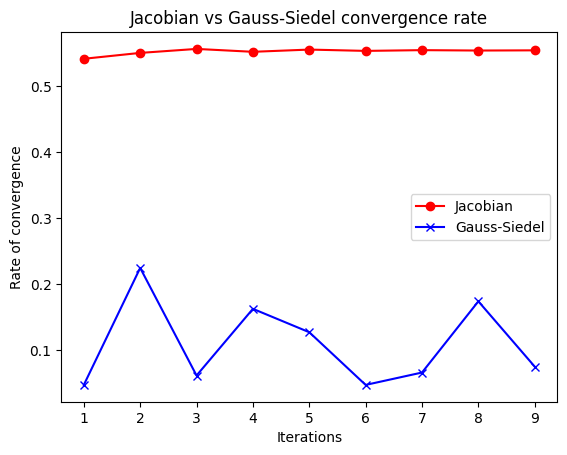

In [ ]:
class CustomError(Exception):
  def __init__(self, message):
    self.message = message
  def __str__(self):
    return f"<class '{self.__class__.__name__}'> {self.message}"

class RowVectorFloat():
  def __init__(self,arr):
    self.arr=arr
  def __str__(self):
    return (" ".join([str(i) for i in self.arr]))
  def __len__(self):
    return len(self.arr)
  def __getitem__(self,ind):
    return self.arr[ind]
  def __setitem__(self,ind,val):
    self.arr[ind]=val
  def __add__(self,other):
    r3=RowVectorFloat([i+j for i,j in zip(self.arr,other.arr)])
    return r3
  def __rmul__(self,num):
    #for 2*object
    temp=RowVectorFloat([num*i for i in self.arr])
    return temp
  def __mul__(self,num):
    #for object*2
    temp=RowVectorFloat([num*i for i in self.arr])
    return temp

class SquareMatrixFloat():

  def __init__(self,n):
    self.matrix=[]
    for i in range(n):
      self.matrix.append(RowVectorFloat([0 for i in range(n)]))
    self.n=n

  def __str__(self):
    s="The matrix is:\n"
    s+="\n".join(" ".join([str(item) for item in row.arr]) for row in self.matrix)
    return s

  def sampleSymmetric(self):
    for i in range(self.n):
      for j in range(self.n):
        if i!=j:
          self.matrix[i][j]=round(random.uniform(0,1),2)
        else:
          self.matrix[i][j]=round(random.uniform(0,self.n),2)

  def toRowEchelonForm(self):
    for i in range(self.n):
      for j in range(i+1,self.n):
          factor=self.matrix[j][i]/self.matrix[i][i]
          m=[factor*i for i in self.matrix[i]]
          for k in range(self.n):
            self.matrix[j][k]=round(self.matrix[j][k]-m[k],2)
      for j in range(self.n):
        self.matrix[i][j]=round(self.matrix[i][j]/self.matrix[i][i],2)

  def isDRDominant(self):
    for row in range(self.n):
      if self.matrix[row][row]<sum([self.matrix[row][i] for i in range(self.n) if i!=row]):
        return False
    return True

  def jSolve(self,barr,iter):
    m=[]
    try:
      if self.isDRDominant():
        x=[0 for i in range(self.n)]
        newx=[0 for i in range(self.n)]
        for i in range(iter):
          for j in range(self.n):
            newx[j]=(barr[j]-(np.dot([x[k] for k in range(self.n) if k!=j],[self.matrix[j][o] for o in range(self.n) if o!=j])))/self.matrix[j][j]
          m.append(np.linalg.norm(np.matmul(self.matrix,np.transpose(newx))-barr))
          x=newx[:]
        return (newx,m)
      else:
        raise CustomError("\nNot solving because convergence is not guranteed")
    except Exception as ce:
      print(ce)
      return ([],[])

  def gsSolve(self,barr,iter):
    m=[]
    try:
      if self.isDRDominant():
        x=[0 for i in range(self.n)]
        newx=[0 for i in range(self.n)]
        for i in range(iter):
          for j in range(self.n):
            newx[j]=(barr[j]-np.dot([newx[k] for k in range(self.n) if k<j],[self.matrix[j][o] for o in range(self.n) if o<j])-
             np.dot([x[k] for k in range(self.n) if k>j],[self.matrix[j][o] for o in range(self.n) if o>j]))/self.matrix[j][j]
          m.append(np.linalg.norm(np.matmul(self.matrix,np.transpose(newx))-barr))
          x=newx[:]
        return (newx,m)
      else:
        raise CustomError("\nNot solving because convergence is not guranteed")
    except Exception as ce:
      print(ce)
      return ([],[])

  def visualiseRate(self,barr,iter):
    try:
      if self.isDRDominant():
        (x1,err1)=self.jSolve(barr,iter)
        (x2,err2)=self.gsSolve(barr,iter)
        xaxis=list(range(1,iter))
        jyaxis=[err1[i]/err1[i-1] for i in range(1,iter)]
        gsyaxis=[err2[i]/err2[i-1] for i in range(1,iter)]
        plt.plot(xaxis,jyaxis,color='r',label="Jacobian",marker="o")
        plt.plot(xaxis,gsyaxis,color='b',label="Gauss-Siedel",marker="x")
        # plt.plot(xaxis,err1[:9])
        # plt.plot(xaxis,err2[:9])
        plt.xlabel("Iterations")
        plt.ylabel("Rate of convergence")
        plt.title("Jacobian vs Gauss-Siedel convergence rate")
        plt.legend()
      else:
        raise CustomError("\nMatrix not diagonally dominant")
    except Exception as ce:
      print(ce)

# r = RowVectorFloat([1,2,3])
# print(r)
# print(len(r))
# r[1]=4
# print(r[1])

# r1=RowVectorFloat([1,1,1])
# r2=RowVectorFloat([1,1,1])
# r3=2*r1+(-3)*r2
# print(r3)

# s = SquareMatrixFloat(3)
# s.sampleSymmetric()
# print(s)
# s.isDRDominant()
# s.toRowEchelonForm()
# print(s)

# s = SquareMatrixFloat(2)
# s.sampleSymmetric()
# print(s)
# s.isDRDominant()
# (error, x) = s.gsSolve([1, 2], 2)
# print("error over each iteration: ",x)
# print("x after certain number of iterations ",error)

s = SquareMatrixFloat(4)
s.sampleSymmetric()
print(s)
s.visualiseRate([1, 2, 3, 4], 10)

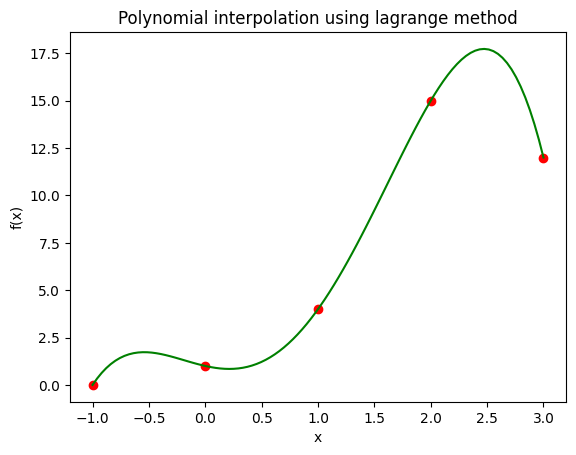

In [ ]:
class Polynomial():
  def __init__(self,coeff):
    self.coeff=coeff

  def __str__(self):
    return ("Coefficients of the polynomial are:\n"+" ".join([str(i) for i in self.coeff]))

  def __getitem__(self,ind):
    l=len(self.coeff)
    ans=0
    for i in range(l):
      ans+=(self.coeff[i]*math.pow(ind,i))
    return int(ans)

  def __add__(self,other):
    if len(self.coeff)<len(other.coeff):
      self.coeff+=[0]*(len(other.coeff)-len(self.coeff))
    elif len(other.coeff)<len(self.coeff):
      other.coeff+=[0]*(len(self.coeff)-len(other.coeff))
    r3=Polynomial([i+j for i,j in zip(self.coeff,other.coeff)])
    return r3

  def __sub__(self,other):
    if len(self.coeff)<len(other.coeff):
      self.coeff+=[0]*(len(other.coeff)-len(self.coeff))
    elif len(other.coeff)<len(self.coeff):
      other.coeff+=[0]*(len(self.coeff)-len(other.coeff))
    r3=Polynomial([i-j] for i,j in zip(self.coeff,other.coeff))
    return r3

  def __rmul__(self,other):
    #for 2*object
    k=Polynomial([other*i for i in self.coeff])
    return k

  def __mul__(self,other):
    #for object*2
    if isinstance(other,(int,float)):
      k=Polynomial([other*i for i in self.coeff])
      return k
    else:
      l1=len(self.coeff)
      l2=len(other.coeff)
      k=Polynomial([0]*(l1+l2-1))
      for i in range(0,l1):
        for j in range(0,l2):
          k.coeff[i+j]+=(self.coeff[i]*other.coeff[j])
      return k

  def show(self,int1,int2):
    x=[]
    y=[]

    for i in np.arange(int1,int2+1,0.5):
      x.append(i)
      y.append(self[i])
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("P(x)")
    equation = "$polynomial = "
    for i, coef in enumerate(self.coeff):
      if i==0 and coef>1:
        equation += f"{coef}x^{{{i}}}"
        equation += " "
      elif i==0 and coef==1:
        equation += f"x^{{{i}}}"
        equation += " "
      elif coef > 1:
        equation += f"+{coef}x^{{{i}}}"
        equation += " "
      elif coef<-1:
        equation += f"{coef}x^{{{i}}}"
        equation += " "
      elif coef==1:
        equation += f"+x^{{{i}}}"
        equation += " "
      elif coef==-1:
        equation += f"-x^{{{i}}}"
        equation += " "
    equation += "$"
    plt.title(equation)
    plt.grid(True)

  def fitViaMatrixMethod(self,points):
    xpoints=[point[0] for point in points]
    ypoints=[point[1] for point in points]
    vandermonde=np.vander(xpoints)
    coefficients=np.linalg.solve(vandermonde,ypoints)
    xsmooth=np.linspace(min(xpoints),max(xpoints),100)
    ysmooth=np.polyval(coefficients,xsmooth)
    plt.scatter(xpoints,ypoints,color='r')
    plt.plot(xsmooth,ysmooth,color='g')
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Polynomial interpolation using matrix method")

  def fitViaLagrangePoly(self,points):
    xpoints=[point[0] for point in points]
    ypoints=[point[1] for point in points]
    eqnlagrange=Polynomial([0])
    for j in range(len(ypoints)):
      lagrangefactor=Polynomial([1])
      for i in range(len(xpoints)):
        if i!=j:
          lagrangefactor*=Polynomial([-xpoints[i]/(xpoints[j]-xpoints[i]),1/(xpoints[j]-xpoints[i])])
      eqnlagrange+=(ypoints[j]*lagrangefactor)
    xsmooth=np.linspace(min(xpoints),max(xpoints),100)
    ysmooth=np.polyval(eqnlagrange.coeff[::-1],xsmooth)
    plt.scatter(xpoints,ypoints,color='r')
    plt.plot(xsmooth,ysmooth,color='g')
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Polynomial interpolation using lagrange method")

# p1 = Polynomial([-1, 1])
# p2 = Polynomial([1, 1, 1])
# p3 = p1 * p2
# print(p3)

# p = Polynomial([1, 2, 3])
# print(p[2])

# p = Polynomial([1, -1, 1, -1])
# p.show(-1, 2)

# p = Polynomial([])
# p.fitViaMatrixMethod([(1,4), (0,1), (-1, 0), (2, 15), (3,12)])

p = Polynomial([])
p.fitViaLagrangePoly([(1,4), (0,1), (-1, 0), (2, 15), (3,12)])

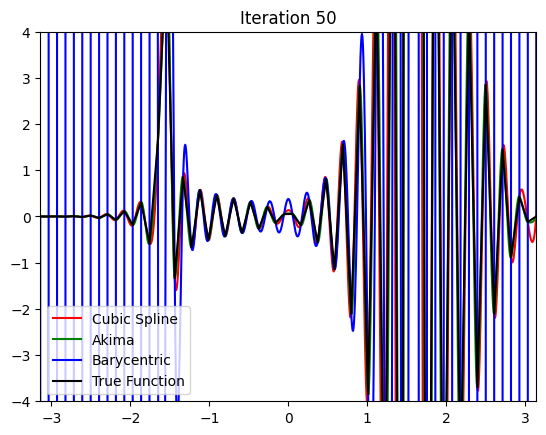

In [ ]:
def update(frame):
    # Generate the x and y data for the current frame
    x = np.linspace(-np.pi, np.pi, frame + 10)
    y = np.tan(x) * np.sin(30 * x) * np.exp(x)

    # Calculate the different interpolations
    y_cs = CubicSpline(x, y)
    y_ak = Akima1DInterpolator(x, y)
    y_bc = BarycentricInterpolator(x, y)

    # Generate x values for the interpolated data
    x_int = np.linspace(-math.pi, math.pi, 1000)

    # Clear the axis
    ax.clear()

    # Plot the different interpolations and the true function
    line_cs, = ax.plot(x_int, y_cs(x_int), 'r', label='Cubic Spline')
    line_ak, = ax.plot(x_int, y_ak(x_int), 'g', label='Akima')
    line_bc, = ax.plot(x_int, y_bc(x_int), 'b', label='Barycentric')
    line_true, = ax.plot(x, y, 'k', label='True Function')

    # Set the x and y limits for the plot
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-4, 4)

    # Add a legend to the plot
    ax.legend()

    # Add a title to the plot with the current iteration number
    ax.set_title(f'Iteration {frame}')

    # Return the artists to be redrawn
    return line_cs, line_ak, line_bc, line_true

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=51, blit=True)

# Define the file location for the GIF

file_location = r"C:\Users\Acer\Downloads\112202007_CMA\animation.gif"

# Define the writer object for the animation
writer = animation.PillowWriter(fps=5)

# Save the animation to the specified file location
anim.save(file_location, writer=writer)

# Show the final plot
plt.show()